# Session 9 - Visualization

## Session agenda
1. Overview of Python’s visualization packages.
2. Introduction to matplotlib.
3. Types of plots.
4. Visualizing scientific data.
5. Visualization of statistical data, the seaborn package.
6. Exporting plots to image formats.

## Overview of Python's visualization packages
Python has a significant number of visualization packages and libraries. Some of them are of general-purpose, others were specifically designed for certain visualization tasks or domain of objects (e.g. graphs or geographical data). Just a list of examples:
1. matplotlib - http://matplotlib.org/
2. plotly - https://plot.ly/python/
3. ggplot - http://ggplot.yhathq.com/
4. seaborn - http://seaborn.pydata.org/
5. geoplotlib - https://github.com/andrea-cuttone/geoplotlib

For some specific task you might need some other visualization library, but provided list should cover most of the cases.

Some libraries incorporate visualization libraries, providing a common interface for performing standard or typical visualization tasks (e.g. pandas - http://pandas.pydata.org/pandas-docs/stable/visualization.html?highlight=color).

## Discussion - critical points in visualization
Before we start with different examples of doing vizualization tasks, let us answer the following points:
1. Why visualization is important? 
2. What is important, when want to visualize something?
3. Which library to use for the visualization? Why?
4. What we can do wrong, when we are doing visualization?
5. Give examples of objects or data, which is hard to visualise and explain why.
6. In visualization terms, what we can use to convey our message about the data?

## Introduction to matplotlib
matplotlib can be considered as core visualization library for creating publication-quality plots. It has a plotting interface similar to MATLAB plotting tools. We will cover some basics of creating plots with matplotlib

In [41]:
from matplotlib import pyplot as plt
import numpy as np

%matplotlib inline

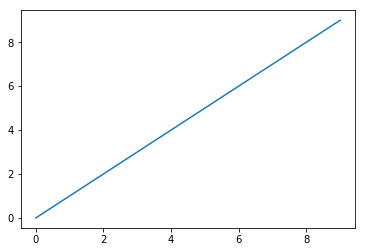

In [42]:
#matplotlib can hide all the mechanics of creating plot
plt.plot(np.arange(10))
plt.show()

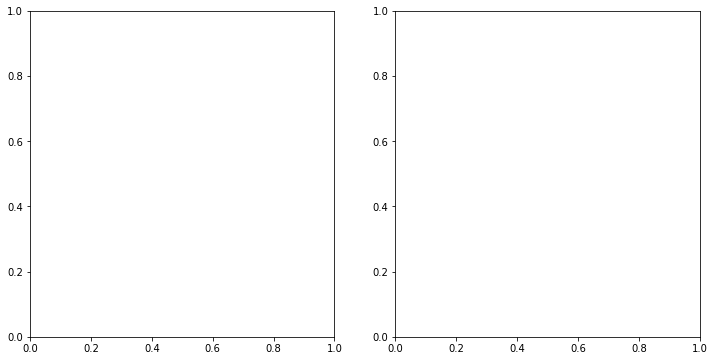

In [43]:
#Creating figure
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

(array([  2.,   0.,   3.,   2.,   5.,   7.,  12.,  10.,  14.,  15.,   7.,
          8.,   6.,   4.,   2.,   1.,   1.,   0.,   0.,   1.]),
 array([-2.67143929, -2.36759547, -2.06375165, -1.75990782, -1.456064  ,
        -1.15222018, -0.84837636, -0.54453253, -0.24068871,  0.06315511,
         0.36699894,  0.67084276,  0.97468658,  1.27853041,  1.58237423,
         1.88621805,  2.19006188,  2.4939057 ,  2.79774952,  3.10159334,
         3.40543717]),
 <a list of 20 Patch objects>)

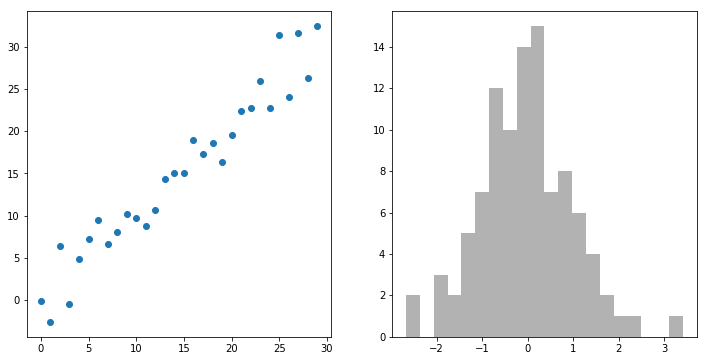

In [44]:
#Creating figure
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))
ax2.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)

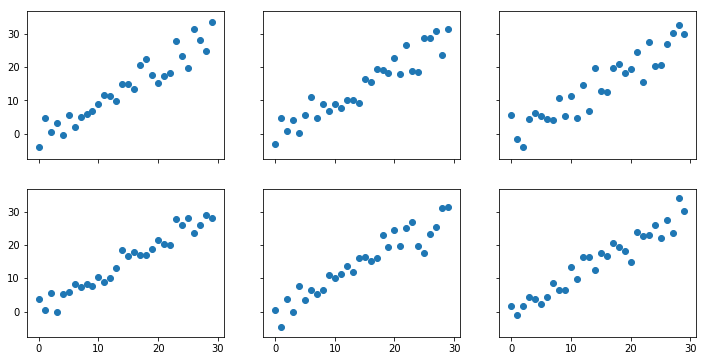

In [73]:
#Subplots
fig, axes = plt.subplots(2,3, sharex=True, sharey=True, figsize = (12,6))
for axe in axes.reshape(-1):
    axe.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

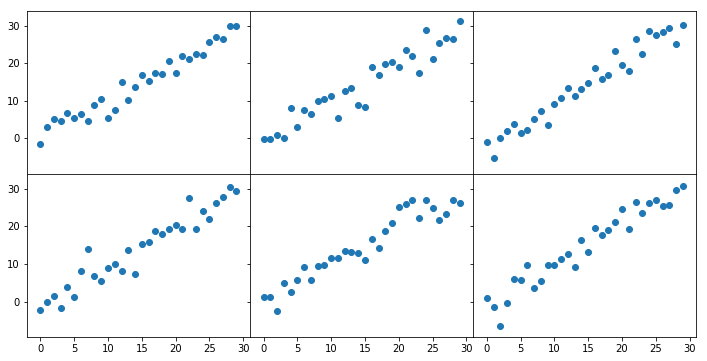

In [74]:
#Subplots
fig, axes = plt.subplots(2,3, sharex=True, sharey=True, figsize = (12,6))
for axe in axes.reshape(-1):
    axe.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))
plt.subplots_adjust(wspace=0, hspace=0)

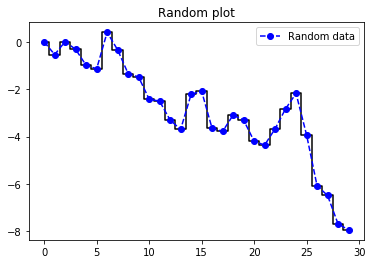

In [100]:
#Customizing the plot
data = np.random.randn(30).cumsum()
plt.plot(data, 'k-',drawstyle='steps-mid')
ax = plt.plot(data, color='b', linestyle='dashed', marker='o', label = 'Random data')
plt.title('Random plot')
plt.legend(loc = 'best')

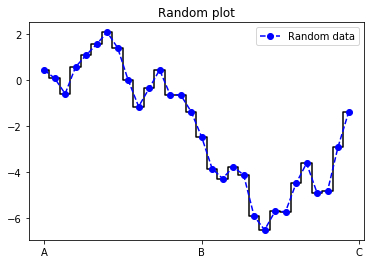

In [110]:
#Set methods
data = np.random.randn(30).cumsum()
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(data, 'k-',drawstyle='steps-mid')
ax.plot(data, color='b', linestyle='dashed', marker='o', label = 'Random data')
ax.set_title('Random plot')
ax.legend(loc = 'best')
ax.set_xticks([0,15,30])
ax.set_xticklabels(['A','B','C'])

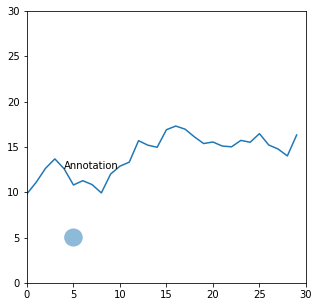

In [140]:
#Adding additional objects to plot
data = np.random.randn(30).cumsum() + 10
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)
ax.plot(data)
ax.set_xlim([0,30])
ax.set_ylim([0,30])
ax.annotate('Annotation',xy=(4,data[4]))
ax.add_patch(plt.Circle((5,5),1, alpha = 0.5))

## Types of plots
matplotlib is pretty lowlevel, but allow you to customize every element of your plot. To discuss different types of plots we will be using different libraries.

In [1]:
import pandas as pd
pd.options.display.mpl_style = 'default'

OptionError: You can only set the value of existing options

In [3]:
#Load data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)
iris_dataframe = dataset

#Inspect dataset
print(iris_dataframe)
print('Dataset shape: ', iris_dataframe.shape)
print('Dataset statistics:\n', iris_dataframe.describe())
print(iris_dataframe.groupby('class').size())

     sepal-length  sepal-width  petal-length  petal-width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]
Dataset shape:  (150, 5)
Dataset statistics:
        sepal-length  sepal-width  petal-le

In [14]:
iris_dataframe[iris_dataframe['class']=='Iris-virginica']

,sepal-length,sepal-width,petal-length,petal-width,class
100,6.3,3.3,6.0,2.5,Iris-virginica
101,5.8,2.7,5.1,1.9,Iris-virginica
102,7.1,3.0,5.9,2.1,Iris-virginica
103,6.3,2.9,5.6,1.8,Iris-virginica
104,6.5,3.0,5.8,2.2,Iris-virginica
105,7.6,3.0,6.6,2.1,Iris-virginica
106,4.9,2.5,4.5,1.7,Iris-virginica
107,7.3,2.9,6.3,1.8,Iris-virginica
108,6.7,2.5,5.8,1.8,Iris-virginica
109,7.2,3.6,6.1,2.5,Iris-virginica


In [ ]:
def classify(item):
    if item['petal-length']<=2.4:
        return 'Iris-setosa'
    else:
        if item['petal-length']<=4.5 and 

In [9]:
for item in iris_dataframe.index:
    print(iris_dataframe.loc[item])

sepal-length            5.1
sepal-width             3.5
petal-length            1.4
petal-width             0.2
class           Iris-setosa
Name: 0, dtype: object
sepal-length            4.9
sepal-width             3.0
petal-length            1.4
petal-width             0.2
class           Iris-setosa
Name: 1, dtype: object
sepal-length            4.7
sepal-width             3.2
petal-length            1.3
petal-width             0.2
class           Iris-setosa
Name: 2, dtype: object
sepal-length            4.6
sepal-width             3.1
petal-length            1.5
petal-width             0.2
class           Iris-setosa
Name: 3, dtype: object
sepal-length            5.0
sepal-width             3.6
petal-length            1.4
petal-width             0.2
class           Iris-setosa
Name: 4, dtype: object
sepal-length            5.4
sepal-width             3.9
petal-length            1.7
petal-width             0.4
class           Iris-setosa
Name: 5, dtype: object
sepal-length          

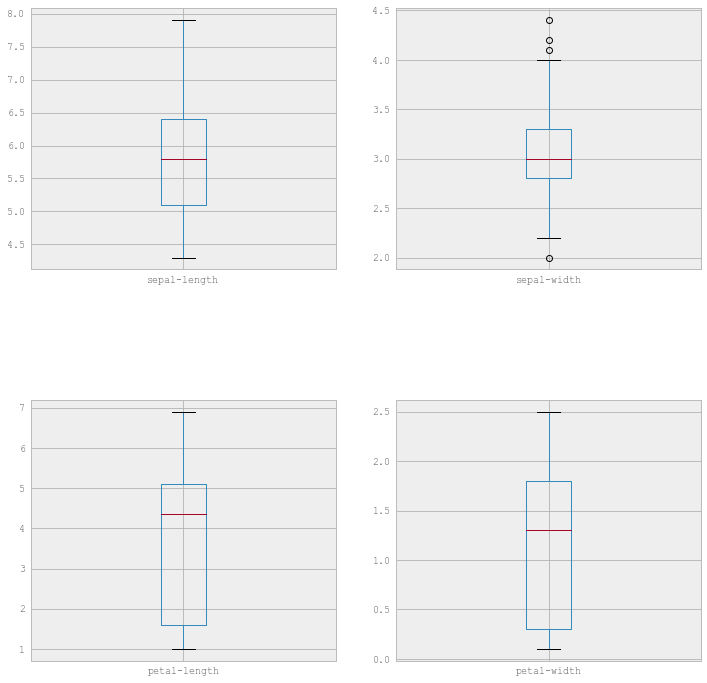

In [145]:
# box and whisker plots
iris_dataframe.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(12,12))
plt.show()

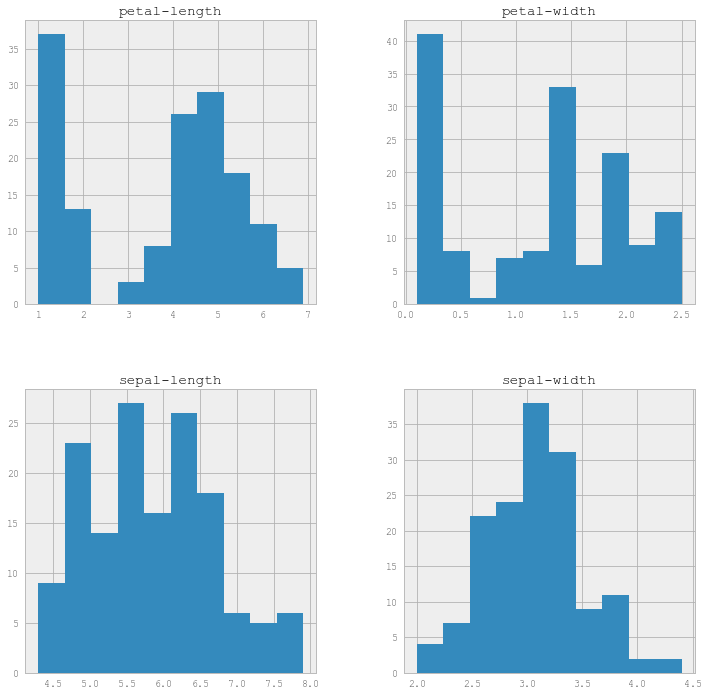

In [146]:
# histograms
iris_dataframe.hist(figsize=(12,12))
plt.show()

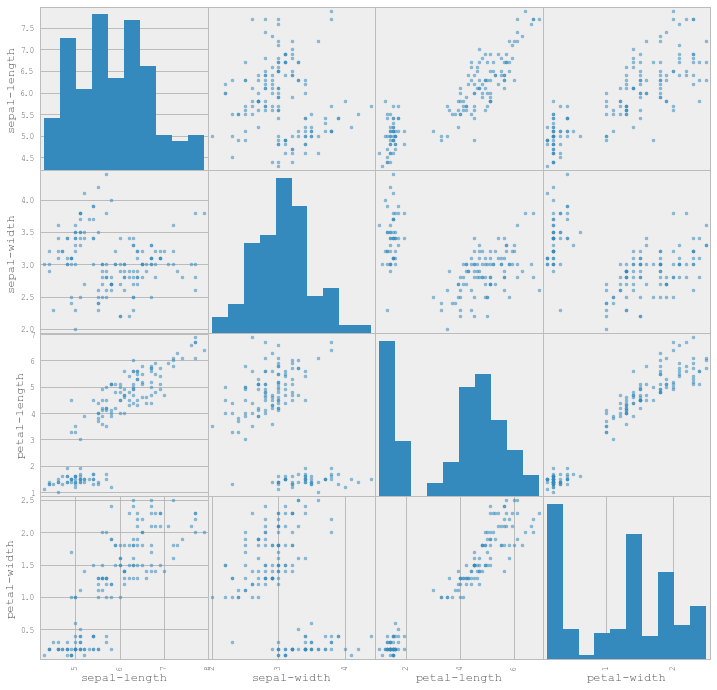

In [147]:
# scatter plot matrix
pd.scatter_matrix(iris_dataframe, figsize=(12,12))
plt.show()

## seaborn package
seaborn package delivers very nice images for visualizing statistical data and has a high-level interface. We will now check how we can do similar plots in seaborn and checkout some other types of plots.

In [150]:
import seaborn as sns

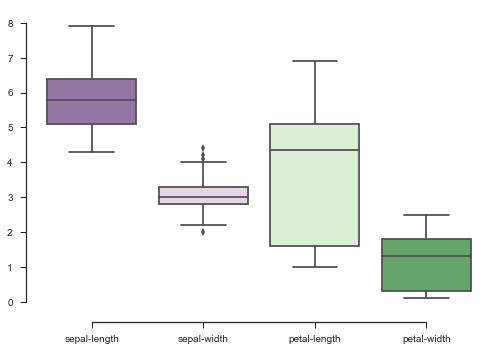

In [151]:
#seaborn boxplot
sns.set(style="ticks")

# Draw a nested boxplot to show bills by day and sex
sns.boxplot(data=iris_dataframe, palette="PRGn")
sns.despine(offset=10, trim=True)

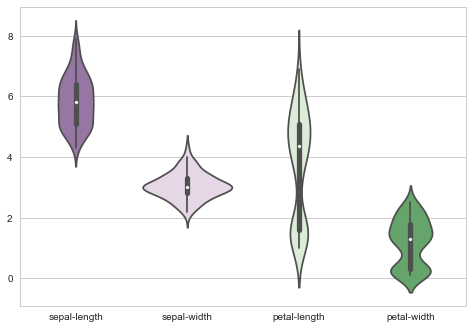

In [155]:
#seaborn violinplot
sns.violinplot(data=iris_dataframe, palette="PRGn")

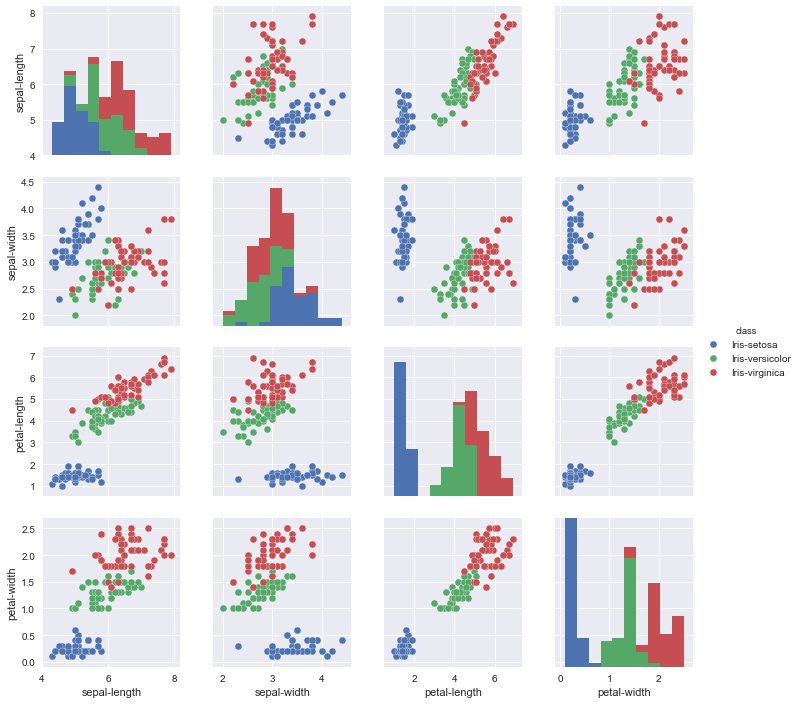

In [160]:
#Scatter plots
sns.set()
sns.pairplot(iris_dataframe, hue = 'class')

In [162]:
from pandas import DataFrame
i3 = ['a','b','c','d','e']
i4 = ['sample_1','sample_2','sample_3','sample_4','sample_5']
df1 = DataFrame(np.random.randn(5,5), columns=i3, index=i4)

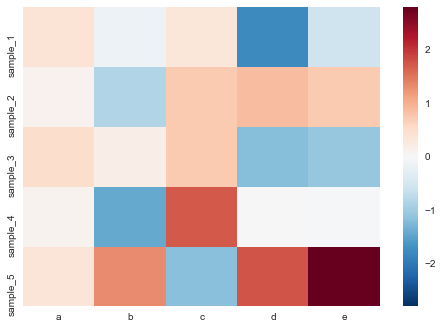

In [163]:
sns.heatmap(df1)

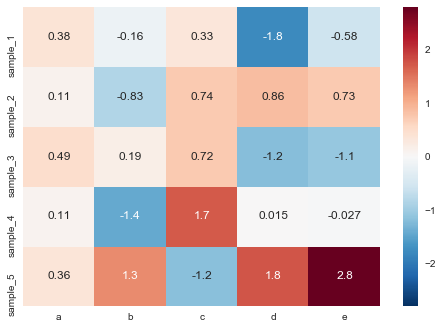

In [164]:
sns.heatmap(df1, annot=True)

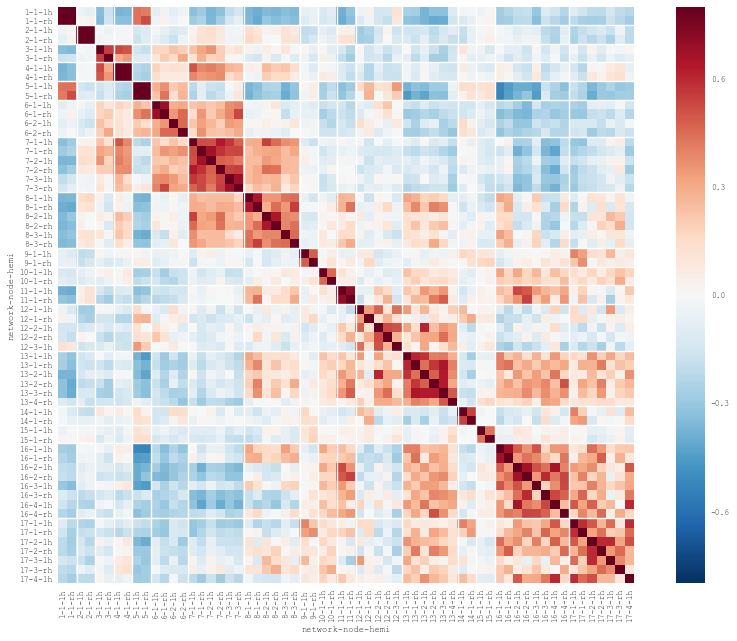

In [165]:
#Correlation matrix heatmap
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(context="paper", font="monospace")

# Load the datset of correlations between cortical brain networks
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)
corrmat = df.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)

# Use matplotlib directly to emphasize known networks
networks = corrmat.columns.get_level_values("network")
for i, network in enumerate(networks):
    if i and network != networks[i - 1]:
        ax.axhline(len(networks) - i, c="w")
        ax.axvline(i, c="w")
f.tight_layout()


Seabron has a very extensive API - http://seaborn.pydata.org/api.html

One more point. In some cases a certain type of plot may not be in the library you typically use. For example, check which libraries support creation of triangular or ternary plots. In this case you have two options: use something low level (e.g. matplotlib) to create this type of plot or switch to the library, which supports this type of plots.

## Exporting plots to file formats
A concluding remark. We can have all our plots in the notebook, but at some point we might want to save them. Usually it is the savefig method, which does the job.

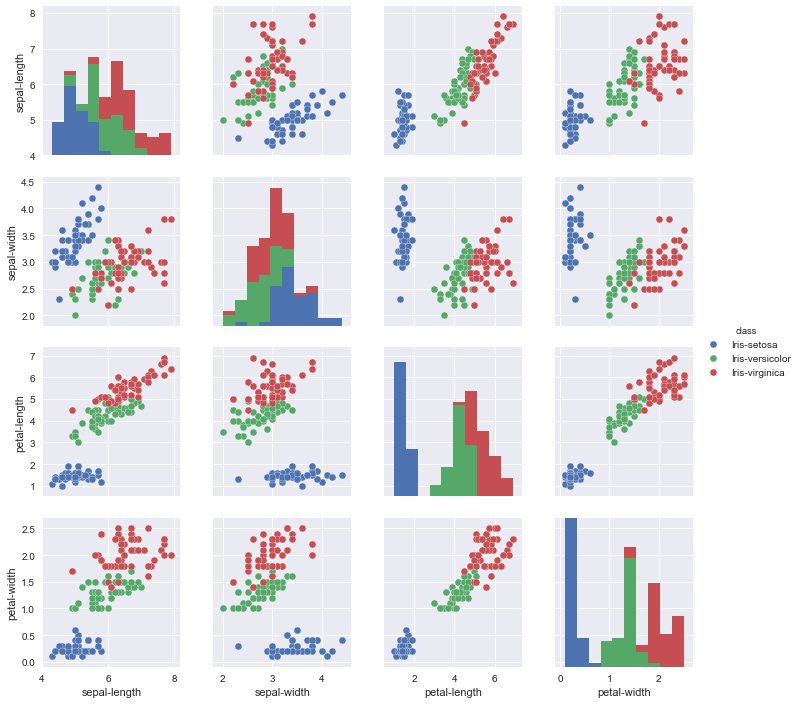

In [168]:
#Scatter plots
sns.set()
pl = sns.pairplot(iris_dataframe, hue = 'class')
pl.savefig('scatter_sns.pdf')